# **HISTOGRAM STRETCHING**




In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("5.jpg")

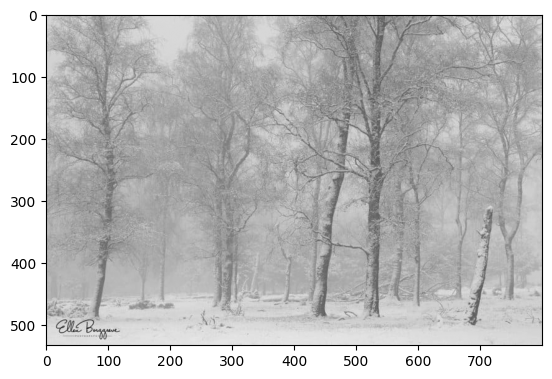

In [3]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey, cmap="gray")

In [4]:
min_val = np.min(img_grey)
max_val = np.max(img_grey)

In [5]:
print(min_val, max_val)

23 224


/tmp/ipython-input-2474767928.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_grey.ravel(), 256, [0,256])


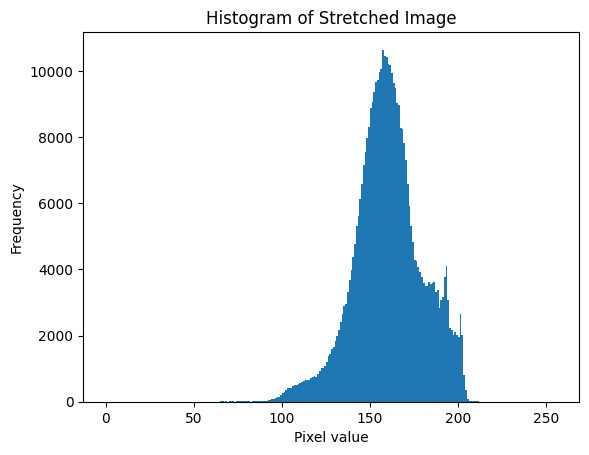

In [6]:
plt.hist(img_grey.ravel(), 256, [0,256])
plt.title("Histogram of Stretched Image")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

In [7]:
#histogram without direct function
dicti = {}
for pixel_value in img_grey.ravel():
  if pixel_value in dicti:
    dicti[pixel_value] += 1
  else:
    dicti[pixel_value] = 1

print(dicti)

{np.uint8(190): 3084, np.uint8(187): 3315, np.uint8(189): 2840, np.uint8(188): 3362, np.uint8(180): 3583, np.uint8(177): 4072, np.uint8(183): 3614, np.uint8(186): 3624, np.uint8(181): 3508, np.uint8(158): 10446, np.uint8(156): 10045, np.uint8(166): 8955, np.uint8(168): 8230, np.uint8(182): 3488, np.uint8(175): 4273, np.uint8(176): 4262, np.uint8(165): 9028, np.uint8(167): 8259, np.uint8(169): 7808, np.uint8(164): 9494, np.uint8(157): 10640, np.uint8(155): 9969, np.uint8(161): 10172, np.uint8(160): 10201, np.uint8(162): 9929, np.uint8(172): 5908, np.uint8(178): 3929, np.uint8(173): 5298, np.uint8(185): 3585, np.uint8(170): 7302, np.uint8(152): 9365, np.uint8(142): 5311, np.uint8(143): 5609, np.uint8(144): 6135, np.uint8(140): 4383, np.uint8(148): 7965, np.uint8(133): 2405, np.uint8(139): 3985, np.uint8(159): 10415, np.uint8(136): 2967, np.uint8(128): 1587, np.uint8(145): 6596, np.uint8(141): 4779, np.uint8(137): 3330, np.uint8(147): 7560, np.uint8(149): 8317, np.uint8(154): 9724, np.uin

In [8]:
rmin = min(dicti.keys())
rmax = max(dicti.keys())
rmax

np.uint8(224)

In [9]:
smin = 0
smax = 255

rmin_int = int(rmin)
rmax_int = int(rmax)
smin_int = int(smin)
smax_int = int(smax)

In [10]:
stretched_img = np.zeros_like(img_grey)

stretched_img = (smax_int - smin_int) / (rmax_int - rmin_int) * (img_grey- rmin_int) + smin_int

stretched_img = np.clip(stretched_img, 0, 255)
stretched_img = stretched_img.astype(np.uint8)

/tmp/ipython-input-1889230235.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(stretched_img.ravel(), 256, [0,256])


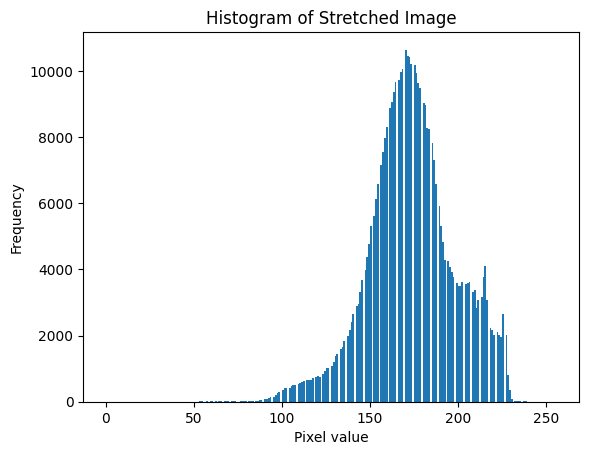

In [11]:
plt.hist(stretched_img.ravel(), 256, [0,256])
plt.title("Histogram of Stretched Image")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

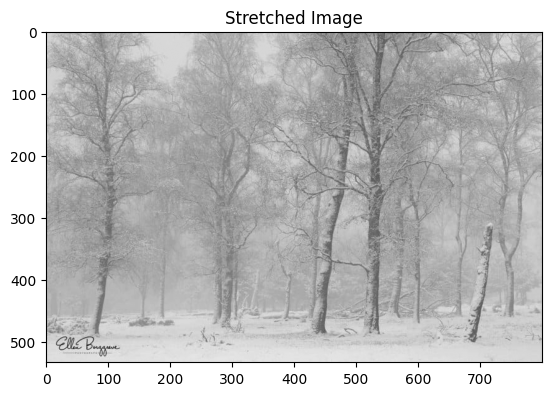

In [12]:
plt.imshow(stretched_img, cmap="gray")
plt.title("Stretched Image")
plt.show()

In [13]:
rmin = np.min(stretched_img)
rmax = np.max(stretched_img)
rmin

np.uint8(0)

In [14]:
rmax

np.uint8(255)

In [15]:
dicti = {}
for pixel_value in stretched_img.ravel():
  if pixel_value in dicti:
    dicti[pixel_value] += 1
  else:
    dicti[pixel_value] = 1

print(dicti,'/n')

{np.uint8(211): 3084, np.uint8(208): 3315, np.uint8(210): 2840, np.uint8(209): 3362, np.uint8(199): 3583, np.uint8(195): 4072, np.uint8(202): 3614, np.uint8(206): 3624, np.uint8(200): 3508, np.uint8(171): 10446, np.uint8(168): 10045, np.uint8(181): 8955, np.uint8(183): 8230, np.uint8(201): 3488, np.uint8(192): 4273, np.uint8(194): 4262, np.uint8(180): 9028, np.uint8(182): 8259, np.uint8(185): 7808, np.uint8(178): 9494, np.uint8(170): 10640, np.uint8(167): 9969, np.uint8(175): 10172, np.uint8(173): 10201, np.uint8(176): 9929, np.uint8(189): 5908, np.uint8(196): 3929, np.uint8(190): 5298, np.uint8(205): 3585, np.uint8(186): 7302, np.uint8(163): 9365, np.uint8(150): 5311, np.uint8(152): 5609, np.uint8(153): 6135, np.uint8(148): 4383, np.uint8(158): 7965, np.uint8(139): 2405, np.uint8(147): 3985, np.uint8(172): 10415, np.uint8(143): 2967, np.uint8(133): 1587, np.uint8(154): 6596, np.uint8(149): 4779, np.uint8(144): 3330, np.uint8(157): 7560, np.uint8(159): 8317, np.uint8(166): 9724, np.uin

# **HISTOGRAM EQUALIZATION**

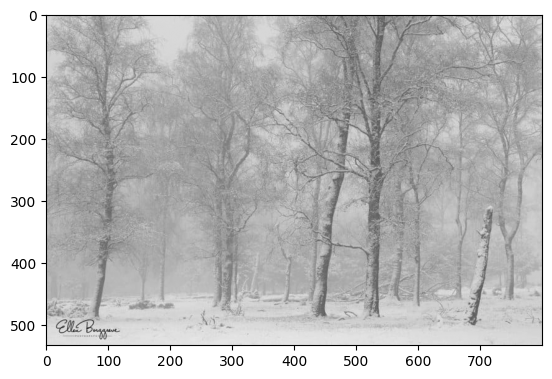

In [16]:
img = cv2.imread("5.jpg")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img, cmap="gray")

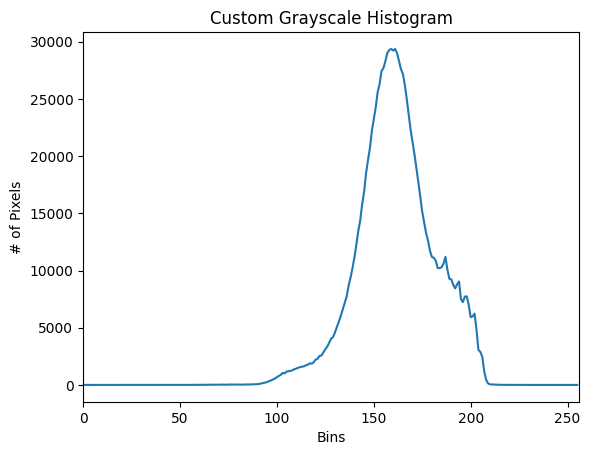

In [28]:
def custom_histogram(image):

  hist = np.zeros(256, dtype=int)

  for row in image:
    for pixel in row:
      hist[pixel] += 1
  return hist

custom_hist = custom_histogram(img)

plt.figure()
plt.title("Custom Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(custom_hist)
plt.xlim([0, 256])
plt.show()

In [26]:
def custom_equalize_histogram_pdf_cdf(image):
    hist = custom_histogram(image)

    pdf = hist / np.sum(hist)

    cdf = np.cumsum(pdf)

    equalized_mapping = (255 * cdf).round().astype(int)

    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j] = equalized_mapping[image[i, j]]

    return equalized_image

In [ ]:
custom_equalized_img_pdf_cdf = custom_equalize_histogram_pdf_cdf(img)

custom_equalized_hist_pdf_cdf = custom_histogram(custom_equalized_img_pdf_cdf)

/tmp/ipython-input-3349268411.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(grey_img.ravel(), 256, [0, 256])


Text(0, 0.5, 'Frequency')

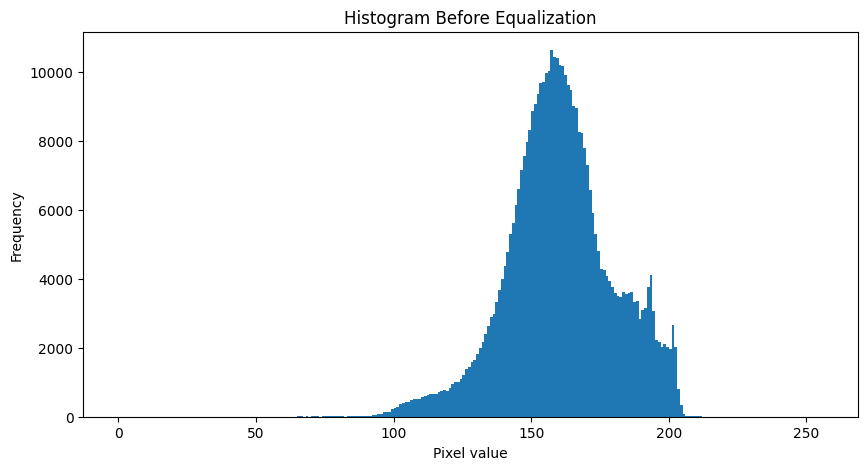

In [27]:
plt.figure(figsize=(10, 5))

plt.hist(grey_img.ravel(), 256, [0, 256])
plt.title('Histogram Before Equalization')
plt.xlabel("Pixel value")
plt.ylabel("Frequency")

/tmp/ipython-input-3255981817.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_img.ravel(), 256, [0, 256])


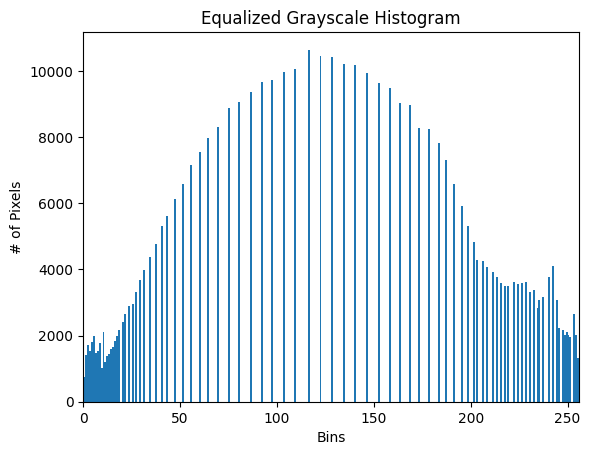

In [29]:

equalized_hist = custom_histogram(equalized_img)

plt.figure()
plt.title("Equalized Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.hist(equalized_img.ravel(), 256, [0, 256])
plt.xlim([0, 256])
plt.show()

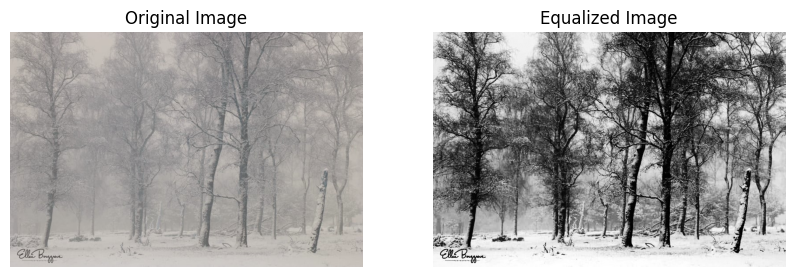

In [30]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()